In [1]:
!git pull

Already up to date.


In [2]:
# !python dqn_script_gw.py

In [3]:
import numpy as np
import torch
from environment.Gridworld import Gridworld
from IPython.display import clear_output
import random
from matplotlib import pylab as plt
from collections import deque
from tests.test_gw import *
from environment.MarketEnv import MarketEnv
from common.properties import *
from dqn_net import DQNNet
from tests.test_gw import *

In [4]:
STATE_DIM = 64 # GW
DQNModel = DQNNet(state_dim = STATE_DIM, output_size = 4) # GW

target_net = copy.deepcopy(DQNModel.model)
target_net.load_state_dict(DQNModel.model.state_dict())

for i in range(epochs):
    game = Gridworld(size=4, mode='random') # GW
    rendered_game_boad_1 = game.board.render_np()
    state1_ = game.board.render_np().reshape(1,64) + np.random.rand(1,64)/100.0
    state1 = torch.from_numpy(state1_).float().to(device = devid)

    status = 1
    mov = 0

    while(status == 1): 
        j+=1
        mov += 1
        qval = DQNModel(state1)
        
        if not torch.cuda.is_available():
            qval_ = qval.data.numpy()
        else:
            qval_ = qval.data.cpu().numpy()
        
        if (random.random() < epsilon):
            action_ = np.random.randint(0,4)
        else:
            action_ = np.argmax(qval_)
        
        reward, state2, done = game.step(action_)
        exp = (state1, action_, reward, state2, done)
        
        replay.append(exp)
        state1 = state2
        
        if len(replay) > batch_size:
            minibatch = random.sample(replay, batch_size)
            Q1, Q2, X, Y, loss = DQNModel.batch_update(minibatch, target_net, STATE_DIM)

            print(i, loss.item())
            clear_output(wait=True)

            DQNModel.optimizer.zero_grad()
            loss.backward()
            losses.append(loss.item())
            DQNModel.optimizer.step()
            
            if j % sync_freq == 0:
                target_net.load_state_dict(DQNModel.model.state_dict())
        
        if done or mov > max_moves:
            status = 0
            mov = 0
        
losses = np.array(losses)

1999 0.05193064734339714


Text(0, 0.5, 'Loss')

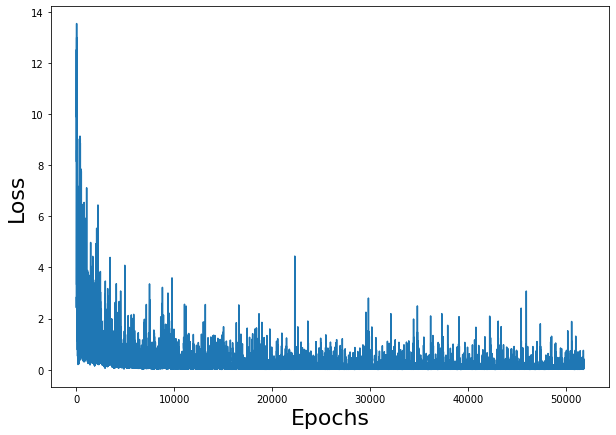

In [5]:
plt.figure(figsize=(10,7))
plt.plot(losses)
plt.xlabel("Epochs",fontsize=22)
plt.ylabel("Loss",fontsize=22)

In [6]:
max_games = 1000
wins = 0
for i in range(max_games):
    win = test_model(DQNModel.model, mode='random', display=False)
    if win:
        wins += 1
win_perc = float(wins) / float(max_games)
print("Games played: {0}, # of wins: {1}".format(max_games,wins))
print("Win percentage: {}%".format(100.0*win_perc))

Games played: 1000, # of wins: 847
Win percentage: 84.7%
